In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
from scipy.optimize import minimize

import clarsach
import xpysis

%matplotlib inline

In [2]:
DATA_DIR = os.environ['HOME'] + "/dev/clarsach/data"
mrk_dir  = DATA_DIR + "/tgcat/obs_15477_tgid_4679/"
mrk_heg1_file = mrk_dir + "heg_1.pha"

In [3]:
mrk421 = xpysis.Spectrum(mrk_heg1_file, telescope='HETG')

In [4]:
mrk421_bkg = xpysis.BkgSpectrum(mrk_heg1_file)

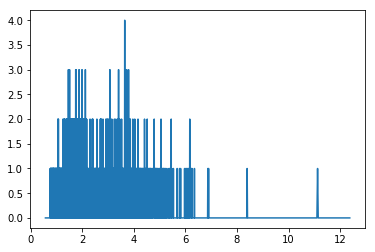

In [5]:
plt.plot(mrk421_bkg.bin_lo, mrk421_bkg.counts)

[]

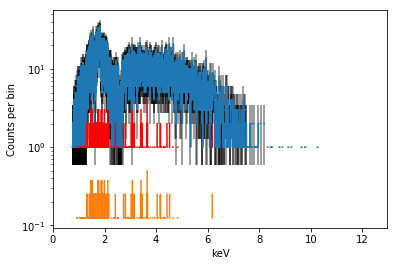

In [7]:
ax = plt.subplot(111)
xpysis.plot_counts(ax, mrk421)
plt.plot(mrk421_bkg.bin_mid, mrk421_bkg.counts * mrk421_bkg.backscal)
plt.plot(mrk421_bkg.bin_mid, mrk421_bkg.counts, color='r')
plt.semilogy()